In [1]:
#import some important libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px  # interactive charts
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import datetime
from datetime import date

print(__version__) # requires version >= 1.9.0

5.7.0


In [2]:
# For Notebooks
init_notebook_mode(connected=True)

In [3]:
import cufflinks as cf

In [4]:
# For offline use
cf.go_offline()

In [5]:
file=pd.read_csv("C:/Users/gluma/Downloads/Supermarket Sales/supermarket_sales - Sheet1.csv")

In [6]:
#see how data looks like
file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
#check for number of rows in columns and investigate the type of data
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
#check rows with NAN values. No NA values appear in the data
file[file.isna().any(axis=1)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [9]:
#descriptive analysis of numerical variables of the dataset
file.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [10]:
#check for duplicates. These are unique transactions
file[["Invoice ID"]].value_counts().sort_values(ascending=False)

Invoice ID 
101-17-6199    1
115-99-4379    1
132-32-9879    1
132-23-6451    1
102-06-2002    1
              ..
892-05-6689    1
894-41-5205    1
895-03-6665    1
895-66-0685    1
898-04-2717    1
Length: 1000, dtype: int64

In [11]:
#Create Year, Month and Weekday we see that only available year is 2019
file['Date'] = pd.to_datetime(file['Date'])
file['Year']=pd.DatetimeIndex(file['Date']).year
file['Month']=pd.DatetimeIndex(file['Date']).month
file['Month_Full'] = file['Date'].dt.month_name()
file['Date'].dt.month_name()
file['weekday']=file['Date'].dt.day_name()
file.head(30)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Month_Full,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,February,Friday
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,...,18:30,Ewallet,597.73,4.761905,29.8865,4.1,2019,3,March,Monday
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,...,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2019,2,February,Monday
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,...,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2019,2,February,Sunday
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,...,17:15,Credit card,72.52,4.761905,3.6260,7.2,2019,1,January,Thursday
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,...,13:27,Credit card,164.52,4.761905,8.2260,5.9,2019,2,February,Wednesday


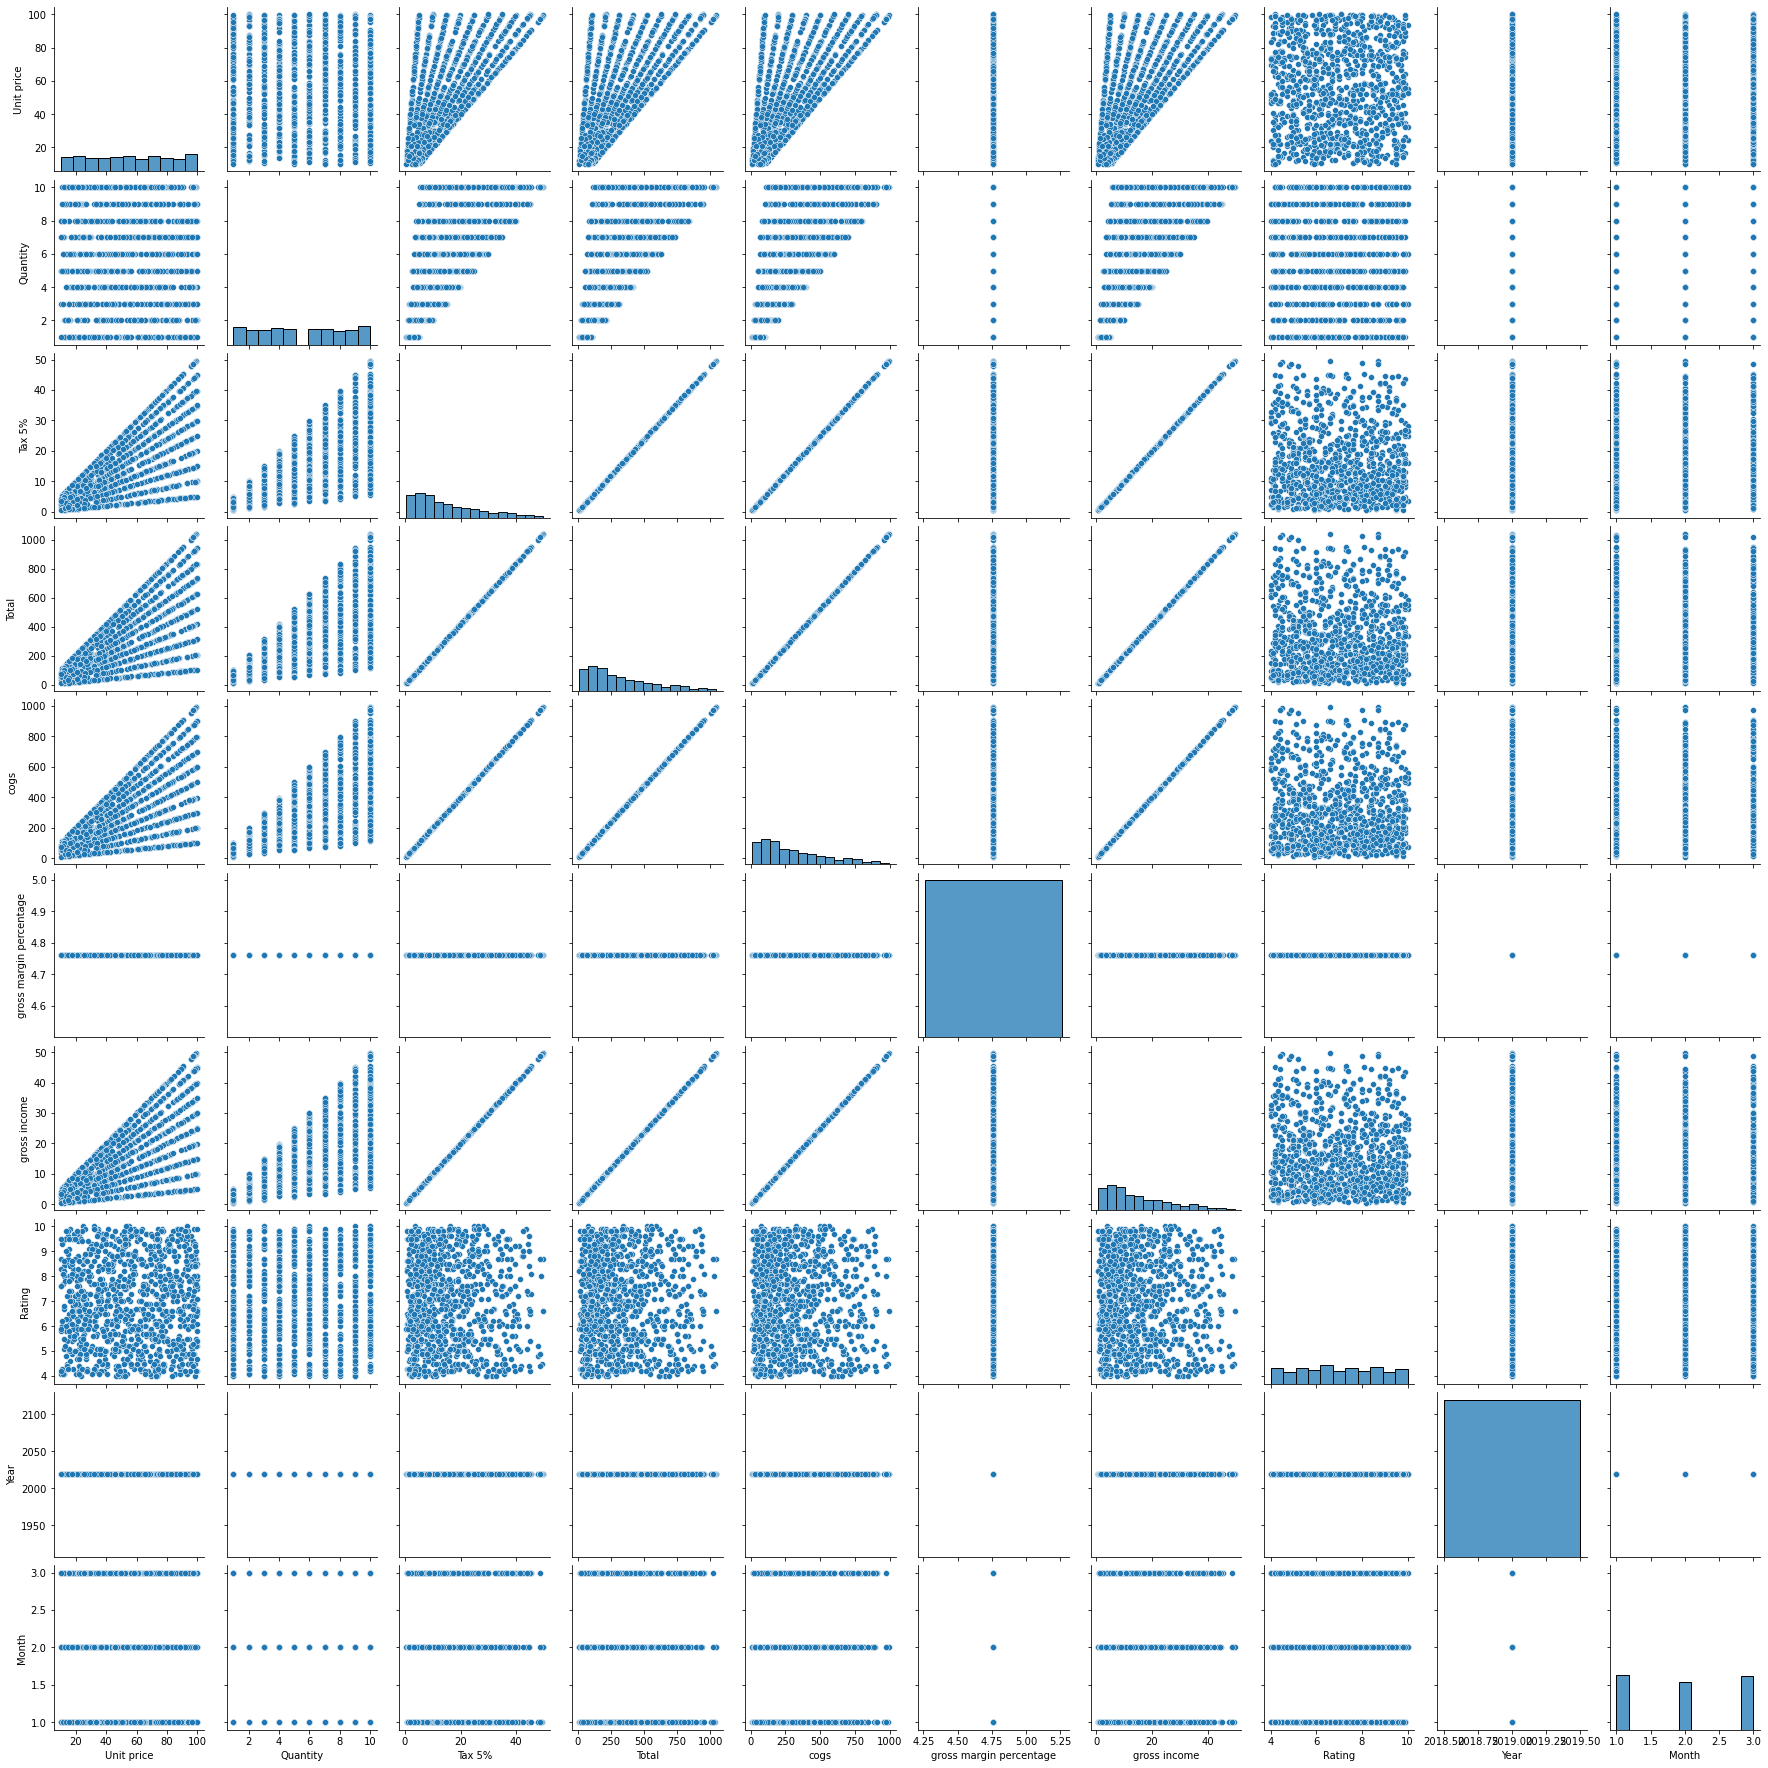

In [12]:
#check for relationship between variables
sns.pairplot(file)

In [13]:
#We see that Branch C is outperforming on the 2 strongest categories which are Food and Electronics
file.pivot(columns='Product line',values='Quantity').sum().sort_values(ascending=False).iplot(kind='bar',title="Quanity per Product Line")
fig = px.histogram(file, x="Branch", y="Quantity", barmode='group',
             height=400)
fig.show()
file.pivot_table(index="Product line",columns='Branch',values='Quantity', aggfunc='sum').iplot(kind='bar',title="Quantity per Product Line per Branch")

In [14]:
file.pivot_table(index="Product line",columns='Branch',values='Unit price', aggfunc='mean').iplot(kind='bar',title="Avg Price per Product Line")

In [15]:
#Calculate Sales without Tax, so Net Sales
file['Sales'] =file['Unit price']*file['Quantity']
file.head()
#Calculate Profit
file['Profit'] =file['Total']-file['cogs']
file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Month_Full,weekday,Sales,Profit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,1,January,Saturday,522.83,26.1415
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,3,March,Friday,76.40,3.8200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,3,March,Sunday,324.31,16.2155
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,1,January,Sunday,465.76,23.2880
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,2,February,Friday,604.17,30.2085


In [16]:
#January is by far the strongest month for all branches
file.pivot(columns='Month_Full',values='Sales').sum().sort_values(ascending=False)

Month_Full
January     110754.16
March       104243.34
February     92589.88
dtype: float64

In [17]:
#Most Sales come from Female clients and Branch C seems to take advantage of this fact, since most of its sales come from women
fig = px.histogram(file, x="Gender", y="Sales", barmode='group',
             height=400)
fig.show()
fig = px.histogram(file, x="Branch", y="Sales",
             color='Gender', barmode='group',
             height=400)
fig.show()

In [18]:
file.pivot(columns="Branch",values='Invoice ID').count().iplot(kind="bar")
file.pivot_table(index="Product line",columns='Branch',values='Invoice ID', aggfunc='count').iplot(kind='bar',title="Transactions per Product Line per Branch")

In [19]:
#Higher average spending for Branch C
df=file.pivot_table(index='Branch',values=['Invoice ID','Sales'], aggfunc={'Invoice ID': 'count','Sales': 'sum'})
df["Average Spending"]=df["Sales"]/df["Invoice ID"]
df

,Invoice ID,Sales,Average Spending
Branch,,,
A,340,101143.21,297.480029
B,332,101140.64,304.640482
C,328,105303.53,321.047348


In [20]:
fig = px.histogram(file, x="Product line", y="Sales",
             color='Gender', barmode='group',
             height=400)
fig.show()

In [21]:
fig = px.histogram(file, x="Branch", y="Sales", barmode='group',
             height=400)
fig.show()
fig = px.histogram(file, x="Product line", y="Sales",
             color='Branch', barmode='group',
             height=400)
fig.show()

In [22]:
fig = px.histogram(file, x="Branch", y="Sales",
             color='Customer type', barmode='group',
             height=400)
fig.show()

In [23]:
fig = px.histogram(file, x="Branch", y="Sales",
             color='Payment', barmode='group',
             height=400)
fig.show()

In [24]:
fig = px.histogram(file, x="Customer type", y="Quantity",
             color='Payment', barmode='group',
             height=400)
fig.show()

In [25]:
#We see that Branch C had a great boost during January in terms of sales by selling more expensive product types
file.pivot_table(index="Month_Full",columns='Branch',values='Sales', aggfunc='sum').iplot()
file.pivot_table(index="Month_Full",columns='Branch',values='Quantity', aggfunc='sum').iplot()

In [26]:
#Lowest Sales performed for each Month of each Branch
file.pivot_table(index="Month_Full",columns='Branch',values='Sales', aggfunc='min')

Branch,A,B,C
Month_Full,,,
February,18.33,29.52,10.17
January,12.09,17.75,12.78
March,15.50,25.45,16.28


In [27]:
#Female clients seem to be satisfied with branch C while for branch A Males are more satisfied.
file.pivot_table(index="Branch",values='Rating', aggfunc='mean').iplot(kind="bar")
file.pivot_table(index="Branch",columns='Gender',values='Rating', aggfunc='mean').iplot(kind="bar")

In [28]:
#Each Branch perfoms in different City.So, looking the Branch or the City is the same thing
file.pivot_table(index='City',columns="Branch",values='Sales', aggfunc='sum')

Branch,A,B,C
City,,,
Mandalay,NaN,101140.64,NaN
Naypyitaw,NaN,NaN,105303.53
Yangon,101143.21,NaN,NaN


In [30]:
#find which Weekday is the most busy in terms of transactions. Saturday is the strongest day
file['weekday'].value_counts().sort_values(ascending=False).iplot(kind='bar')

In [31]:
#Branch that generates the most profit
file.pivot_table(index="Branch",values='Profit', aggfunc='sum').sort_values(by='Branch',ascending=False).iplot(kind="bar")

In [33]:
#Product line that generates the most profit
file.pivot_table(index="Product line",values='Profit', aggfunc='sum').sort_values(by='Product line',ascending=False).iplot(kind="bar")